# Рабочая тетрадь 6 Разшильдяев Александр

## 1.1.1 Пример
***Задача:*** 
Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.

***Решение:***

In [1]:
class Perceptron:
    def __init__(self, N):
        self.w = list()
        for i in range(N):
            self.w.append( 0)
    
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
    
    def learn(self, la, x, y):
        if y * self.calc(x) <=  0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
    
    def learning(self, la, T):
        for n in range(100):
            for t in T:
                self.learn(la, t[ 0], t[1])

perceptron = Perceptron(2)
la = 0.1

T = list()
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[5, 7], -1])
perceptron.learning(la, T)

print(perceptron.w)
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


## 1.1.2 Пример

In [4]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


In [5]:
import numpy as np
class OurNeuralNetwork:
    '''
    Данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0, 1]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))

0.7216325609518421


## Теоретический материал - обучение нейронной сети

In [6]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1], 4)
        self.weights1   = np.random.rand(4, 1)
        self.y          = y
        self.output     = np.zeros(y.shape)

In [7]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1], 4)
        self.weights2   = np.random.rand(4, 1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
    
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        

In [8]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1], 4)
        self.weights2   = np.random.rand(4, 1)
        self.y          = y
        self.output     = np.zeros(self.y.shape)
    
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    
    def backprop(self):
        
        d_weights2 = np.dot(self.layer1.T, (2 * (self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2 * (self.y - self.output) * sogmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        
        self.weigths1 += d_weights1
        self.weights2 += d_weights2

## Задание
***Задача:*** 

Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. Данные нейросети:
    
- три входа (𝑥1,𝑥2,𝑥3);
- три нейрона в скрытых слоях (ℎ1,ℎ2,ℎ3);
- выход (𝑜1).

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [0.5,0.5,0.5]
- 𝑏 = 0

Данные нейросети:
- два входа (𝑥1,𝑥2);
- два нейрона в скрытых слоях (ℎ1,ℎ2);
- два выхода (𝑜1,𝑜2).

Нейроны имеют идентичные веса и пороги:
- 𝑤 = [1,0];
- 𝑏 = 1.

***Решение:***

In [9]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class NeuralNetwork:
    '''
    Данные нейросети:
        - три входа (x1, x2, x3)
        - три нейрона в скрытых слоях (h1, h2, h3)
        - выход (о1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0.5, 0.5, 0.5]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([.5, .5, .5])
        bias = 0

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        
        return out_o1
    
network = NeuralNetwork()
x = np.array([2, 3, 4])
print(network.feedforward(x)) 

0.8151036049051821


In [10]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)

class NeuralNetwork:
    '''
    Данные нейросети:
        - два входа (x1, x2)
        - два нейрона в скрытых слоях (h1, h2)
        - два выхода (о1, o2)
    Нейроны имеют идентичные веса и пороги:
        - w = [1, 0]
        - b = 1
    '''
    def __init__(self):
        weights = np.array([1, 0])
        bias = 1

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)

        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
        
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)

        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        
        return out_o1, out_o2
    
network = NeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)[0], network.feedforward(x)[1])

0.8757270529783324 0.8757270529783324


## Задание
***Задача:*** 

Реализуйте классы нейронных сетей с использованием других функций активации.

***Решение:***

In [16]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return x * (x > 0)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def feedforward_sigmoid(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    def feedforward_tanh(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
    def feedforward_relu(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return relu(total)

class NeuralNetwork:
    '''
    Данные нейросети:
        - три входа (x1, x2, x3)
        - три нейрона в скрытых слоях (h1, h2, h3)
        - выход (о1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0.5, 0.5, 0.5]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([.5, .5, .5])
        bias = 0

        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        
        self.o1 = Neuron(weights, bias)
    def feedforward_sigmoid(self, x):
        out_h1 = self.h1.feedforward_sigmoid(x)
        out_h2 = self.h2.feedforward_sigmoid(x)
        out_h3 = self.h3.feedforward_sigmoid(x)
        
        out_o1 = self.o1.feedforward_sigmoid(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    def feedforward_tanh(self, x):
        out_h1 = self.h1.feedforward_tanh(x)
        out_h2 = self.h2.feedforward_tanh(x)
        out_h3 = self.h3.feedforward_tanh(x)
        
        out_o1 = self.o1.feedforward_tanh(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    def feedforward_relu(self, x):
        out_h1 = self.h1.feedforward_relu(x)
        out_h2 = self.h2.feedforward_relu(x)
        out_h3 = self.h3.feedforward_relu(x)
        
        out_o1 = self.o1.feedforward_relu(np.array([out_h1, out_h2, out_h3]))
        return out_o1
    
    
network = NeuralNetwork()
x = np.array([2, 3, 4])
print(f'Sigmoid: {network.feedforward_sigmoid(x)}')
print(f'Tanh: {network.feedforward_tanh(x)}')
print(f'ReLU: {network.feedforward_relu(x)}')

Sigmoid: 0.8151036049051821
Tanh: 0.9050813365686774
ReLU: 6.75


## 1.2
## MLPCLassifier

In [17]:
# Загрузка библиотек

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

In [18]:
from sklearn.datasets import load_digits, load_boston

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes : ', X_digits.shape, Y_digits.shape)

Dataset Sizes :  (1797, 64) (1797,)


In [19]:
boston = load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset Sizes : ', X_boston.shape, Y_boston.shape)

Dataset Sizes :  (506, 13) (506,)


R:\progs\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
  

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits,
                                                    train_size = 0.80, test_size = 0.20, stratify = Y_digits,
                                                    random_state = 123)

print('Train/Test Sizes : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
                                                   

Train/Test Sizes :  (1437, 64) (360, 64) (1437,) (360,)


In [22]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state = 123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(activation = 'relu', alpha = 0.0001, batch_size = 'auto', beta_1 = 0.9,
              beta_2 = 0.999, early_stopping = False, epsilon = 1e-08,
              hidden_layer_sizes = (100,), learning_rate = 'constant',
              learning_rate_init = 0.001, max_iter = 200, momentum = 0.9,
              n_iter_no_change = 10, nesterovs_momentum = True, power_t = 0.5,
              random_state = 123, shuffle = True, solver = 'adam', tol = 0.0001,
              validation_fraction = 0.1, verbose = False, warm_start = False)

Y_preds = mlp_classifier.predict(X_test)

print(Y_preds[:15])
print(Y_test[:15])

print('Test Accuracy : %.3f'%mlp_classifier.score(X_test, Y_test))

print('Training Accuracy : %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy : 0.983
Training Accuracy : 1.000


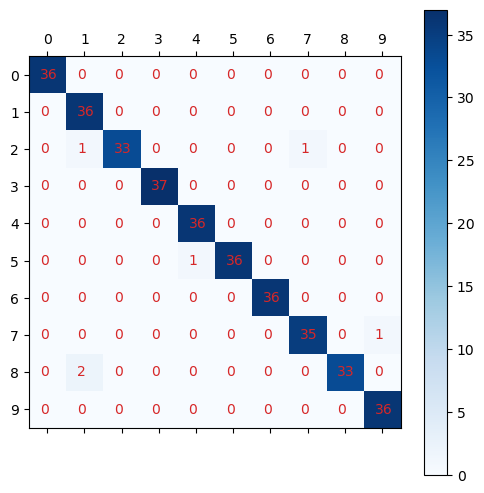

In [23]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    
    fig = plt.figure(figsize = (6, 6))
    plt.matshow(conf_mat, cmap = plt.cm.Blues, fignum = 1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2, j+0.1, str(conf_mat[j, i]), color = 'tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

In [24]:
print("Loss : ", mlp_classifier.loss_)
print("Number of Coefs : ", len(mlp_classifier.coefs_))
print("Number of Inrercepts : ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran : ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function : ", mlp_classifier.out_activation_)

Loss :  0.003472868499418062
Number of Coefs :  2
Number of Inrercepts :  2
Number of Iterations for Which Estimator Ran :  125
Name of Output Layer Activation Function :  softmax


## MIPRegressor

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_boston, Y_boston, train_size=.80, test_size=.20, random_state=123)
print('Train/Test Sizes : ', x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Train/Test Sizes :  (404, 13) (102, 13) (404,) (102,)


In [27]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train, y_train)

y_preds = mlp_regressor.predict(x_test)

print(y_preds[:10])
print(y_test[:10])
# Метод Score оценивает точность моделей классификации
print('Test R^2 Score : %.3f'%mlp_regressor.score(x_test, y_test))
print('Training R^2 Score : %.3f'%mlp_regressor.score(x_train, y_train))

[ 7.32543601 24.33417853 32.46700507 15.19086054 25.6749167  25.07797685
 27.20985668  2.62269853 15.25691994 28.02637784]
[15.  26.6 45.4 20.8 34.9 21.9 28.7  7.2 20.  32.2]
Test R^2 Score : 0.462
Training R^2 Score : 0.510


In [28]:
print('Loss : ', mlp_regressor.loss_)

Loss :  28.53817406111961


In [29]:
print('Number of Coefs : ', len(mlp_regressor.coefs_))
[weights.shape for weights in mlp_regressor.coefs_]

Number of Coefs :  2


[(13, 100), (100, 1)]

In [30]:
print('Number of Iterations for Which Estimator Ran : ', mlp_regressor.n_iter_)

Number of Iterations for Which Estimator Ran :  130


In [31]:
print('Name of Output Layer Activation Function : ', mlp_regressor.out_activation_)

Name of Output Layer Activation Function :  identity


## Задание
***Задача:*** 

Используйте классы MLPClassified и MLPRegressor для классификации и регрессии произвольных данных из интернета. Проведите анализ атрибуты, полученных моделей. Для классификации можете взять набор данных Ирисов: https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv а для регрессии датасет зависимости заработной платы от опыта работы: https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv

***Решение:***

## Цветы

In [72]:
class_data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
x_data, y_data = class_data.iloc[:, :-1], class_data['variety']
print('Dataset Sizes : ', x_data.shape, y_data.shape)

Dataset Sizes :  (150, 4) (150,)


In [73]:
from sklearn.neural_network import MLPClassifier

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, test_size=0.2, stratify=y_data, random_state=123)
print('Train/Test Sizes : ', x_train.shape, x_test.shape, y_train.shape, y_test.shape)

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train, y_train)

y_preds = mlp_classifier.predict(x_test)

print(*y_preds[:10])
print(*y_test[:10])


Train/Test Sizes :  (120, 4) (30, 4) (120,) (30,)
Versicolor Setosa Virginica Virginica Setosa Setosa Virginica Virginica Virginica Setosa
Versicolor Setosa Virginica Virginica Setosa Setosa Virginica Versicolor Virginica Setosa


R:\progs\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
# Метод Score для оценки точности моделей классификации
print('Test Accuracy : %.3f'%mlp_classifier.score(x_test, y_test))

print('Training Accuracy : %.3f'%mlp_classifier.score(x_train, y_train))

Test Accuracy : 0.933
Training Accuracy : 0.983


## Зарплата

In [117]:
reg_data = pd.read_csv('https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv')
x_data, y_data = reg_data.iloc[:, :-1], reg_data['Salary']

print('Dataset Sizes : ', x_data.shape, y_data.shape)
x_data.head()

Dataset Sizes :  (30, 1) (30,)


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [114]:
y_data.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=.80, test_size=.20, random_state=123)
print('Train/Test Sizes : ', x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Train/Test Sizes :  (24, 1) (6, 1) (24,) (6,)


In [123]:
from sklearn.neural_network import MLPRegressor

mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train, y_train)

y_preds = mlp_regressor.predict(x_test)

print(*y_preds)
print(*list(y_test))

20.262346279647666 55.278175202717804 18.821358115608366 50.482744871594164 20.262346279647666 50.96228790470653
54445.0 121872.0 56642.0 116969.0 64445.0 112635.0


R:\progs\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [124]:
# Метод Score оценивает точность моделей классификации
print('Test Score : %.3f'%mlp_regressor.score(x_test, y_test))
print('Training Score : %.3f'%mlp_regressor.score(x_train, y_train))

Test Score : -8.796
Training Score : -8.261
